In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt


In [ ]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
#normalization of images range 0 to 1
train_images,test_images=train_images/255,test_images/255


In [ ]:
class_names=["airoplane","automobiles","bird","cat","deer","dog","frog","horse","ship","truck"]

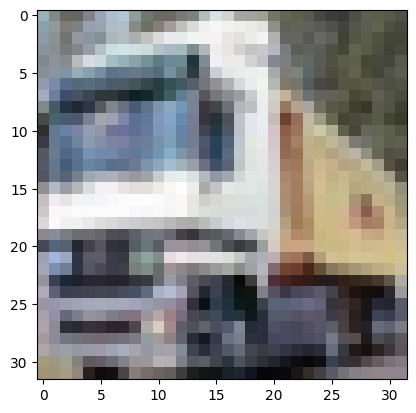

In [ ]:
plt.imshow(train_images[1])

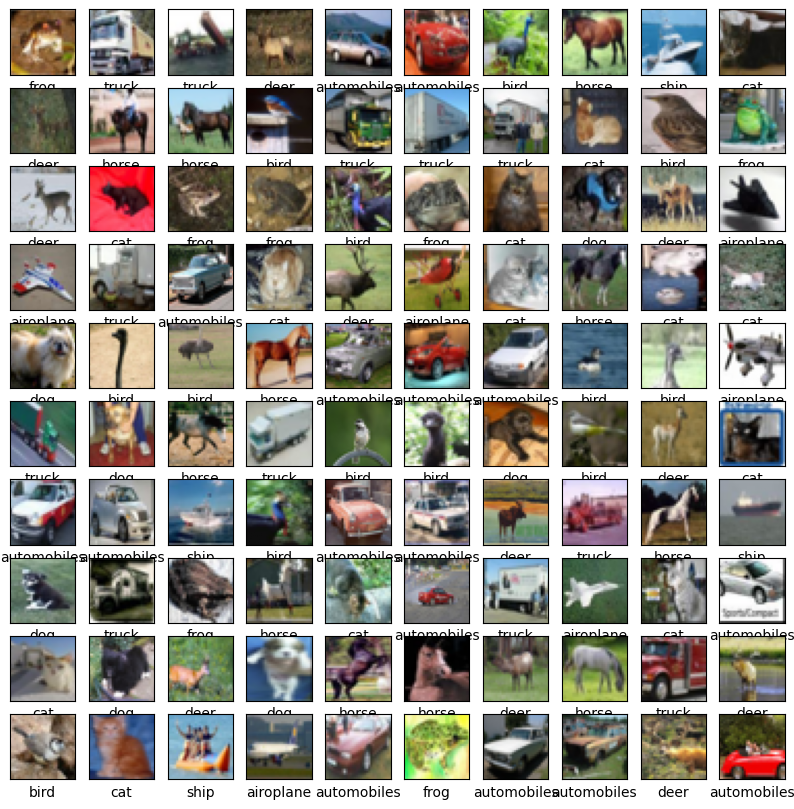

In [ ]:
plt.figure(figsize=(10,10))
count=0
for i in range(0,100):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


In [ ]:
history=model.fit(train_images,train_labels,epochs=15,validation_data=(test_images,test_labels))

Epoch 1/15
1563/1563 [==============================] - 86s 54ms/step - loss: 2.7166 - accuracy: 0.0999 - val_loss: 2.3026 - val_accuracy: 0.0974
Epoch 2/15
1563/1563 [==============================] - 82s 52ms/step - loss: 2.3026 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.0974
Epoch 3/15
1563/1563 [==============================] - 86s 55ms/step - loss: 2.3026 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.0974
Epoch 4/15
1563/1563 [==============================] - 82s 53ms/step - loss: 2.3026 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.0974
Epoch 5/15
1563/1563 [==============================] - 89s 57ms/step - loss: 2.3026 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.0974
Epoch 6/15
1563/1563 [==============================] - 88s 56ms/step - loss: 2.3026 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.0974
Epoch 7/15
1563/1563 [==============================] - 82s 53ms/step - loss: 2.3026 - accuracy: 0.0975 - val_loss: 2.3026 -

In [ ]:
# Assume 'model' is your trained deep learning model
# Train your model...

# Save the entire model to a file
model.save('/content/model_cifer10.h5')  # Change the path as needed



# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/model_cifer10.h5 /content/drive/MyDrive/


# New Section

In [ ]:
from google.colab import files

# Download the model file to your local machine
files.download('/content/model_cifer10.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pip install flask

In [ ]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
from flask import Flask, render_template, request, jsonify

# Set the environment variable before importing TensorFlow
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

# Load your CIFAR-10 model
model = tf.keras.models.load_model('model_cifer10.h5')

app = Flask(__name__)

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return jsonify({'error': 'No file part'})

    file = request.files['file']

    if file.filename == '':
        return jsonify({'error': 'No selected file'})

    if file:
        # Preprocess the image
        class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
        img = Image.open(file.stream).resize((32, 32))
        img_array = np.array(img)
        img_array = img_array.reshape((1, 32, 32, 3))

        # Make prediction
        prediction = model.predict(img_array)
        class_index = np.argmax(prediction)
        confidence = prediction[0, class_index]

        # Map class index to class name
        class_name = class_names[class_index]

        return jsonify({'class': class_name, 'confidence': float(confidence)})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
